In [1]:
import numpy as np
import numpy.typing as npt
from skimage import io
import matplotlib.pyplot as plt

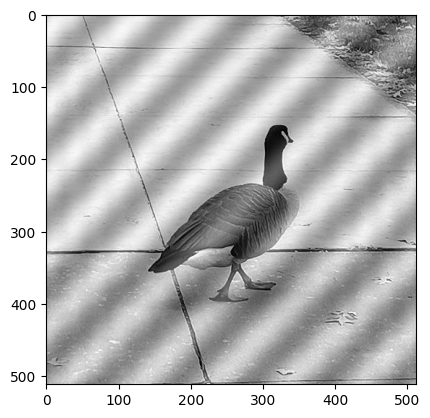

In [2]:
img: npt.NDArray[np.uint8] = io.imread("./img/periodic_pidgeon.jpg")

plt.imshow(img, cmap="gray")
plt.show()

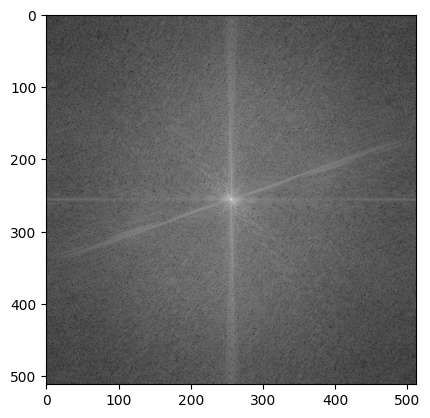

In [3]:
H, W = img.shape

x, y = np.mgrid[0:H, 0:W]

centered_img = img * (-1)**(x+y)

img_dft = np.fft.fft2(centered_img)
img_dft_mod = np.sqrt(img_dft.real**2 + img_dft.imag**2)

spect = np.log(1 + img_dft_mod)
plt.imshow(spect, cmap="gray")

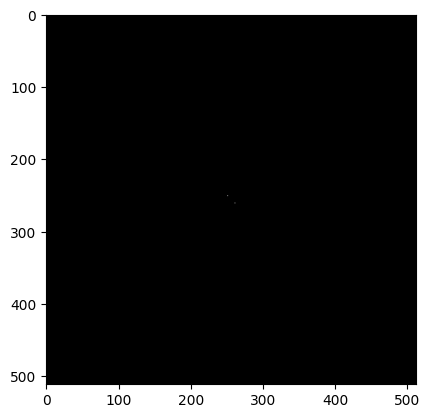

In [170]:
lowpass_filter = np.ones(img.shape)

border: int = 10

lowpass_filter[251,251] = 0
lowpass_filter[261,261] = 0

plt.imshow(lowpass_filter, cmap="binary")

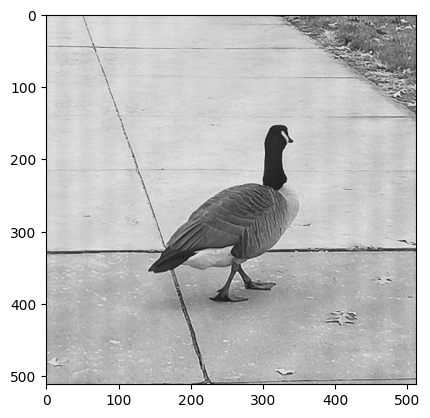

In [176]:
filtered_dft = img_dft*lowpass_filter

filtered_img_spect = np.sqrt(p.real**2 + p.imag**2)
filtered_img = np.fft.ifft2(img_dft*lowpass_filter)

filtered_img = filtered_img * (-1)**(x+y)

plt.imshow(filtered_img.real, cmap="grey")

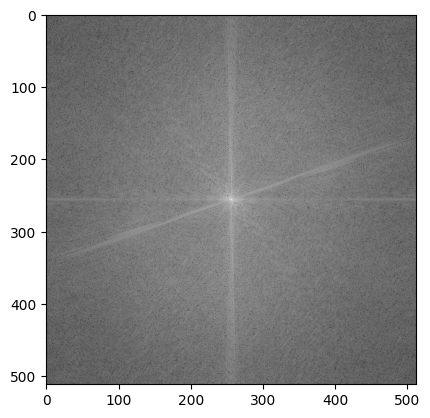

In [177]:

plt.imshow(np.log(1 + filtered_img_spect), cmap="grey")